#### **The Dataset used for this challenge is [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci)**

##### Import Libraries

In [1]:
# Import the necessary packages used in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../HeartDisease"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'heart.csv', 'heartdisease.ipynb']


#### Read the dataset and save to variable datafr

In [2]:
datafr = pd.read_csv("../HeartDisease/heart.csv", error_bad_lines=False)

#### Displaying the structure of dataset

In [3]:
display(datafr.head(10))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


#### Identifying the shape of the dataset

In [4]:
# Dimension of the datatset
print("Dimension of the dataset is: ",datafr.shape)
# Check if any column has missing value
datafr.isnull().sum()

Dimension of the dataset is:  (303, 14)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Since there are no NaNs here thus we do not require to impute any missing values

#### Description of each column
* age: age in years
* sex: female=0; male=1
* cp: chest pain type (4 levels)
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results (3 levels)
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy (3 levels)
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target: (class variable) with 1 or 0

#### Categorical attributes are :-
"cp","fbs", "restecg", "ca", "thal"

#### Numeric attributes are :-
"age", "sex", "trestbps", "chol", "thalach", "exang", "oldpeak", "slope"

#### Visualizing the ratio of dataset based on attribute sex

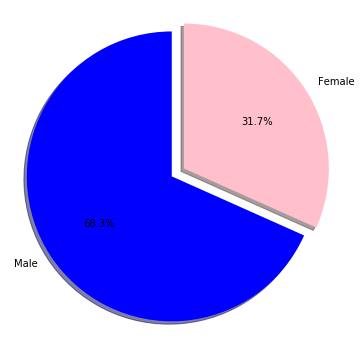

In [5]:
male =len(datafr[datafr['sex'] == 1])
female = len(datafr[datafr['sex']== 0])

plt.figure(figsize=(6,6))

# Data to plot
labels = 'Male','Female'
sizes = [male,female]

# Plot
plt.pie(sizes, explode=(0, 0.1), labels=labels, colors=['blue','pink'],
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

#### Plot displaying male and female with potential heart disease based on age

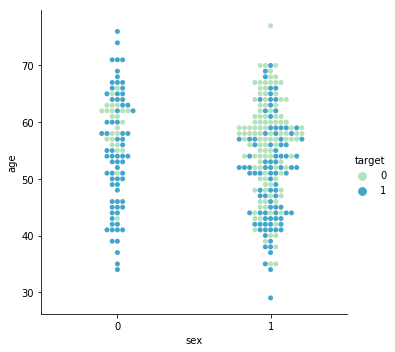

In [6]:
sns.catplot(x="sex", y="age", hue="target", kind="swarm", data=datafr, palette='GnBu')

#### Visualizing the ratio of different chest pain types in the dataset

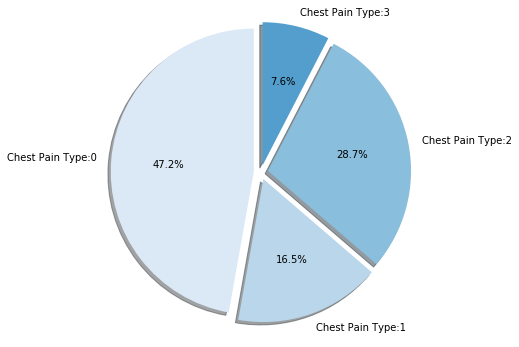

In [7]:
# Data to plot
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(datafr[datafr['cp'] == 0]),len(datafr[datafr['cp'] == 1]),
         len(datafr[datafr['cp'] == 2]),
         len(datafr[datafr['cp'] == 3])]

plt.figure(figsize=(6,6))

# Plot
plt.pie(sizes, explode=(0.05, 0.05, 0.05, 0.05), labels=labels, colors=sns.color_palette("Blues"),
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

#### Plot displaying potential of heart disease based on various levels of chest pain types by age

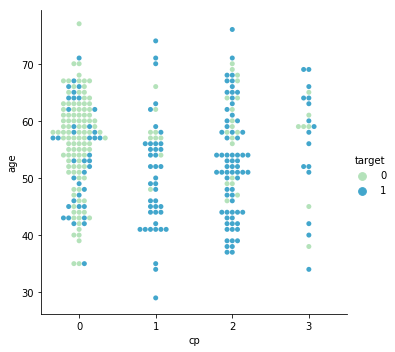

In [8]:
sns.catplot(x="cp", y="age", hue="target", kind="swarm", data=datafr, palette='GnBu')

Text(0.5, 1.0, 'Chest Pain vs Heart Disease')

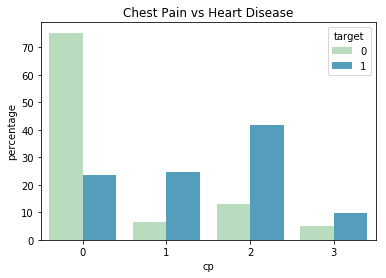

In [9]:
"""
Normalizing the values and then making it as a DataFrame and then plotting using sns.barplot.
"""
temp = (datafr.groupby(['target']))['cp'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "cp", y = "percentage", hue = "target", data = temp, palette='GnBu')\
.set_title("Chest Pain vs Heart Disease")

#### Visualizing the ratio of dataset based on (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

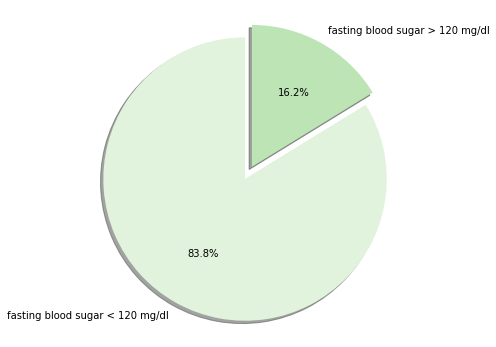

In [10]:
# Data to plot
labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
sizes = [len(datafr[datafr['fbs'] == 0]),len(datafr[datafr['cp'] == 1])]

plt.figure(figsize=(6,6))
 
# Plot
plt.pie(sizes, explode=(0.05, 0.05), labels=labels, colors=sns.color_palette("Greens"),
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()   

#### Checking the distribution of feature 'thalach: maximum heart rate achieved'

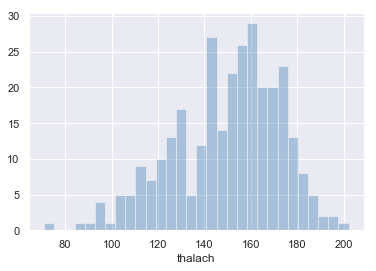

In [11]:
sns.set(style="darkgrid")
sns.distplot(datafr['thalach'],kde=False,bins=30,color='steelblue')

The distribution is normal indicating most population fall between 140-180 with some left tail indicating few outliers which we can validate once we create a scatterplot  with residuals, leverage and cook's distance.

#### Checking the distribution of feature 'chol: serum cholestoral in mg/dl'

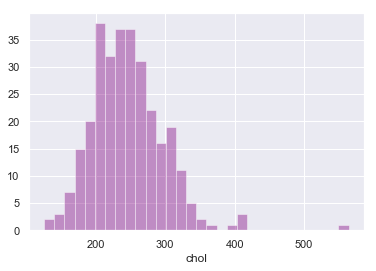

In [12]:
sns.distplot(datafr['chol'],kde=False,bins=30,color="purple")

The distribution is normal indicating most population falls between 200-300 which some right tail indicating few outliers which we can validate once we create a scatterplot with residuals, leverage and cook's distance.

#### Visualizing the distribution of people having heart disease based on age

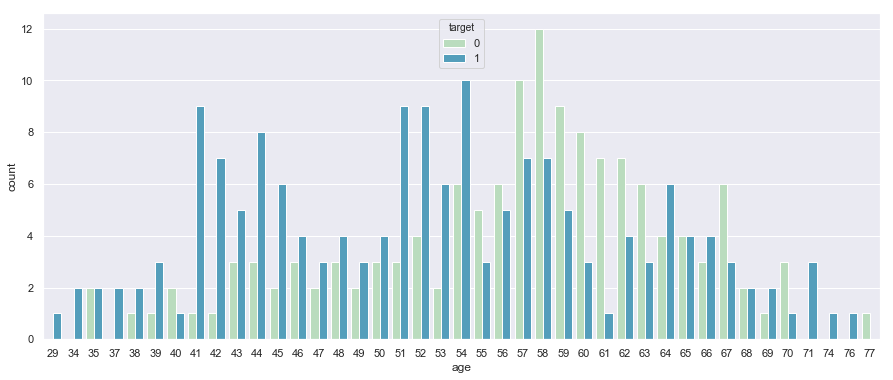

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = datafr, hue = 'target',palette='GnBu')
plt.show()

#### Splitting the dataset into test and train

In [14]:
# Predictor variables
X= datafr.drop('target',axis=1)
# Target or Class variable
Y=datafr['target']

In [15]:
# Let's using scikit learn to split our dataset
from sklearn.model_selection import train_test_split
# USing 70:30 ratio for train:test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=30)

In [16]:
X_train.shape

(212, 13)

In [17]:
X_test.shape

(91, 13)

#### Preprocessing and Cleaning

In [18]:
# Using StandardScaler to scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


#### Using  First Machine Learning Approach

In [19]:
# Start with Support Vector Machine for Binary Classification
from sklearn import svm
clf = svm.SVC(gamma='scale')
# Creare a model with X_train and Y_train data
clf.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
# Run the model on X_test to predict the target labels
predict1 = clf.predict(X_test)

In [21]:
# Compare the predicted target labels with Y_test
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy using SVM Model: {:.2f}%".format(accuracy_score(Y_test,predict1)*100))

Accuracy using SVM Model: 82.42%
